In [1]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
from folium import plugins

# Matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans


print('All done!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0

<H1>Introduction/Business Problem

<h2>1.1 Scenario and Background

I currently live and work in Skopje, the capital of Northern Macedonia. In the environment where I live I have all the necessary elements for a quality life. What was interesting to me was to compare the prices of renting a place to live in downtown Manhattan, 
where I would enjoy the benefits that I currently enjoy in Skopje.

<h2>1.2 Problem to be resolved:

The goal is to find an apartment in Manhattan that will have similar features and benefits to the one I am staying in Skopje.

Criteria:
    - Apartment with min 2 bedroom with monthly rent < $5000 per month
    - Area with ammenities and venues 

<h2>1.3 Interested Audience

The target group of this project would be all those who live in one of the capitals in countries across Europe and who would like to move and live in Manhattan.

<h1>Data Section

In order to be able to make an appropriate conclusion regarding our challenge, we need appropriate data that will serve as a basis for further analysis. We specifically need a list of apartments near Manhattan with data on the number of rooms, beds, location, address, etc. The list of required data has already been worked on in the previous laboratory exercises within the course and as such has been used here as well.

Тhe csv file 'mh_neigh_data.csv' has the following data structure:

Borough	Neighborhood	Latitude	Longitude	Cluster Labels
Manhattan	Marble Hill	4.087.655.077.879.960	-7.391.065.965.862.980	2
Manhattan	Chinatown	4.071.561.842.231.430	-7.399.427.936.255.970	2
Manhattan	Washington Heights	4.085.190.252.555.300	-7.393.690.027.985.230	4
Manhattan	Inwood	4.086.768.396.449.910	-7.392.121.042.203.890	3
Manhattan	Hamilton Heights	40.823.604.284.811.900	-7.394.968.791.883.360	0
Manhattan	Manhattanville	408.169.344.294.978	-739.573.853.935.188	3
Manhattan	Central Harlem	4.081.597.606.742.410	-7.394.321.112.603.900	2
Manhattan	East Harlem	4.079.224.946.663.030	-7.394.418.223.148.520	4
Manhattan	Upper East Side	40.775.638.573.301.800	-7.396.050.763.135	0
Manhattan	Yorkville	40.775.929.849.884.800	-7.394.711.784.471.820	2
Manhattan	Lenox Hill	4.076.811.265.828.730	-739.588.596.881.376	3

<h1>Methodology section

The strategy is based on using the data above to obtain at least a few candidate rental apartments in Manhattan.
By using visual approach and maps we will be able to more easily represent these locations and make an appropriate selection

By processing the data we will be able to answer the main questions that interest us:
    - cost of available rental places
    - venues of the two best places to live
    - other interesting statistical data

We will map the current residence and venues in neighborhood in Skopje for comparison to Manhattan

My current coordinates are @41.9860195,21.4369272

In [18]:
neighborhood_latitude=41.9860195
neighborhood_longitude=21.4369272

In [19]:
CLIENT_ID = 'ISOZKQ0XHDRRFWL514MZBFDYTS1VCSPDIJY4U3X4SBNBWNI1' # your Foursquare ID
CLIENT_SECRET = 'TS2FHRUXJ1Q4DC1C2B0S5XVGIATJ3PAQHX32CFPUMUG2EXLB' # your Foursquare Secret
VERSION = '20200101' # Foursquare API version

In [22]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 300 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()

In [23]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f3905ba3694f37b7b286fe8'},
 'response': {'headerLocation': 'Skopje',
  'headerFullLocation': 'Skopje',
  'headerLocationGranularity': 'city',
  'totalResults': 6,
  'suggestedBounds': {'ne': {'lat': 41.9887195027, 'lng': 21.440552831923544},
   'sw': {'lat': 41.983319497299995, 'lng': 21.433301568076455}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51097fece4b075eab71b6255',
       'name': 'Фитнес Центар "60 Минути За Неа"',
       'location': {'lat': 41.98666689328865,
        'lng': 21.437033751615377,
        'labeledLatLngs': [{'label': 'display',
          'lat': 41.98666689328865,
          'lng': 21.437033751615377}],
        'distance': 72,
        'cc': 'MK',
        'city': 'Скопје',
        'state': 'Општина Карпош',


In [24]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
venues = results['response']['groups'][0]['items']
SGnearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
SGnearby_venues =SGnearby_venues.loc[:, filtered_columns]
# filter the category for each row
SGnearby_venues['venue.categories'] = SGnearby_venues.apply(get_category_type, axis=1)
# clean columns
SGnearby_venues.columns = [col.split(".")[-1] for col in SGnearby_venues.columns]

SGnearby_venues.shape

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


AttributeError: 'Series' object has no attribute '_mgr'

In [26]:
SGnearby_venues.head(10)

AttributeError: 'NoneType' object has no attribute 'items'

                         venue.name  \
0  Фитнес Центар "60 Минути За Неа"   
1                Gostilnica Fontana   
2                    "Jakomo" Pizza   
3                        Шехерезада   
4              Ресторан Бисера - Ив   
5                             Чешма   

                                    venue.categories  venue.location.lat  \
0  [{'id': '4bf58dd8d48988d175941735', 'name': 'G...           41.986667   
1  [{'id': '4bf58dd8d48988d1df931735', 'name': 'B...           41.986403   
2  [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...           41.987663   
3  [{'id': '4bf58dd8d48988d1d0941735', 'name': 'D...           41.985438   
4  [{'id': '4bf58dd8d48988d1ce941735', 'name': 'S...           41.986832   
5  [{'id': '4bf58dd8d48988d1df931735', 'name': 'B...           41.984218   

   venue.location.lng  
0           21.437034  
1           21.437001  
2           21.436748  
3           21.437881  
4           21.436918  
5           21.438734  

In [ ]:
latitude=41.986019
longitude=21.436927
skopje_map = folium.Map(location=[latitude, longitude], zoom_start=18)
# add markers to map
for lat, lng, label in zip(SGnearby_venues['lat'], SGnearby_venues['lng'], SGnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(skopje_map)  
    
skopje_map

In [41]:
import pandas as pd
data = pd.read_csv("price.csv") 
data.head()


AttributeError: 'NoneType' object has no attribute 'items'

             Address             Area  Price_per_ft2  Rooms  Area-ft2  \
0  West 105th Street  Upper West Side           2.94    5.0      3400   
1   East 97th Street  Upper East Side           3.57    3.0      2100   
2  West 105th Street  Upper West Side           1.89    4.0      2800   
3        CARMINE ST.     West Village           3.03    2.0      1650   
4    171 W 23RD ST.           Chelsea           3.45    2.0      1450   

   Rent_Price  Lat  Long  
0       10000  NaN   NaN  
1        7500  NaN   NaN  
2        5300  NaN   NaN  
3        5000  NaN   NaN  
4        5000  NaN   NaN  

<AxesSubplot:xlabel='Rent_Price'>

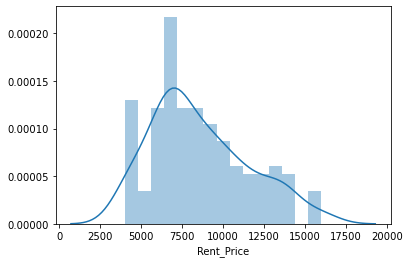

In [42]:

import seaborn as sns
sns.distplot(data['Rent_Price'],bins=15)

<AxesSubplot:xlabel='Price_per_ft2'>

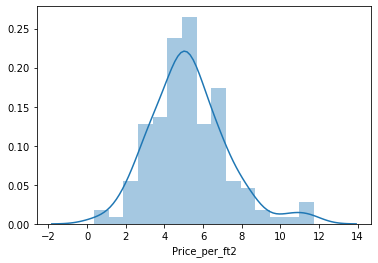

In [44]:
import seaborn as sns
sns.distplot(data['Price_per_ft2'],bins=15)

<AxesSubplot:xlabel='Rooms', ylabel='Rent_Price'>

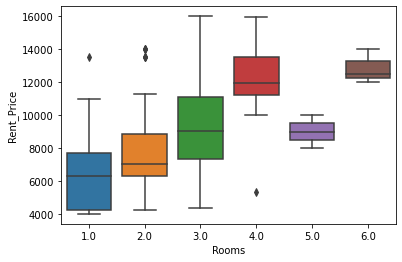

In [45]:
sns.boxplot(x='Rooms', y= 'Rent_Price', data=data)

<h1> Conclusion

From the analysis we can conclude that there are suitable apartments that meet the conditions we set ourselves at the beginning.